# Análise Comparativa de Criptomoedas

Análise de Bitcoin, Ethereum e Solana com foco em:
- Retorno acumulado
- Volatilidade
- Relação risco-retorno



## Metodologia

Os dados foram coletados via API pública e passaram por um pipeline de:

1. Coleta de dados (raw)
2. Tratamento e cálculo de retorno diário
3. Cálculo de métricas estatísticas
4. Consolidação e ranking comparativo

Os resultados foram exportados para a pasta `data/results`.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")  


In [35]:
df = pd.read_csv("../data/results/crypto_metrics.csv", index_col=0)

df



,cumulative_return,volatility,sharpe_ratio
bitcoin,-0.286318,0.460388,-0.501581
ethereum,-0.237725,0.781106,0.039826
solana,-0.571451,0.851536,-0.567964


In [36]:
df_plot = df.copy()

df_plot.index = ["Bitcoin", "Ethereum", "Solana"]

df_plot["cumulative_return"] = df_plot["cumulative_return"] * 100
df_plot["volatility"] = df_plot["volatility"] * 100

df_plot


,cumulative_return,volatility,sharpe_ratio
Bitcoin,-28.631824,46.038755,-0.501581
Ethereum,-23.772499,78.110561,0.039826
Solana,-57.145114,85.153568,-0.567964


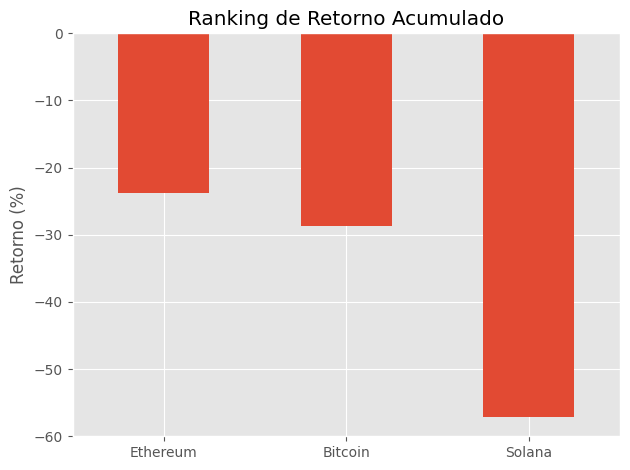

In [37]:
df_sorted = df_plot.sort_values("cumulative_return", ascending=False)

plt.figure()
df_sorted["cumulative_return"].plot(kind="bar")
plt.title("Ranking de Retorno Acumulado")
plt.ylabel("Retorno (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



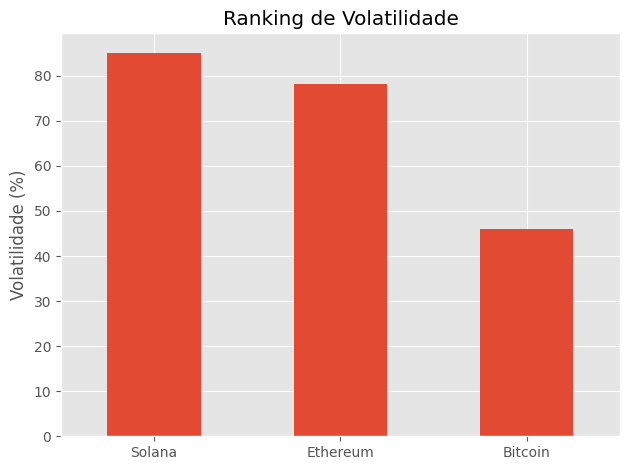

In [38]:
df_sorted_risk = df_plot.sort_values("volatility", ascending=False)

plt.figure()
df_sorted_risk["volatility"].plot(kind="bar")
plt.title("Ranking de Volatilidade")
plt.ylabel("Volatilidade (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


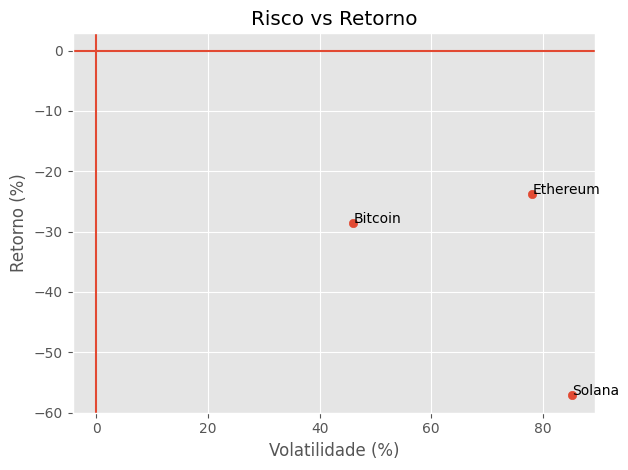

In [39]:
plt.figure()

plt.scatter(df_plot["volatility"], df_plot["cumulative_return"])

for idx in df_plot.index:
    plt.annotate(
        idx,
        (df_plot.loc[idx, "volatility"],
         df_plot.loc[idx, "cumulative_return"])
    )

plt.axhline(0)
plt.axvline(0)

plt.xlabel("Volatilidade (%)")
plt.ylabel("Retorno (%)")
plt.title("Risco vs Retorno")
plt.tight_layout()
plt.show()



## Interpretação dos Resultados

- Ethereum apresentou o melhor desempenho relativo no período.
- Solana apresentou maior volatilidade.
- Bitcoin demonstrou menor risco comparado às demais.
- Nenhum ativo apresentou retorno positivo no período analisado.

